# Running a recipe in a notebook

The goal of this notebook is to demonstrate and test the functionality to load and run recipes directly from the notebook. See associated PR here: https://github.com/ESMValGroup/ESMValCore/pull/907

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from esmvalcore.experimental import CFG

/home/stef/r/esmvalcore/esmvalcore/experimental/_warnings.py:18: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:254: ESMValToolDeprecationWarning: `write_plots` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:255: ESMValToolDeprecationWarning: `write_netcdf` will be removed in 2.2.0.
/home/stef/r/esmvalcore/esmvalcore/experimental/config/_config_validators.py:256: ESMValToolDeprecationWarning: `output_file_type` will be removed in 2.2.0.


## Getting a recipe

Recipes can be obtained by their name, similar to what one may already be familiar with through `esmvaltool recipes list`. To do so, use `get_recipe`.

In [3]:
from esmvalcore.experimental import get_recipe

recipe = get_recipe('examples/recipe_python.yml')
recipe

## Recipe python

Example recipe that plots a map and timeseries of temperature.

### Authors
 - Bouwe Andela (NLeSC, Netherlands; https://orcid.org/0000-0001-9005-8940)
 - Mattia Righi (DLR, Germany; https://orcid.org/0000-0003-3827-5950)

### Maintainers
 - Manuel Schlund (DLR, Germany; https://orcid.org/0000-0001-5251-0158)

### Projects
 - DLR project ESMVal
 - Copernicus Climate Change Service 34a Lot 2 (MAGIC) project

### References
 - Please acknowledge the project\(s\)\.


## Running a recipe

Run the recipe by using the `.run` method. 

The session can be defined as an arguement, but if left out, a new session is created automatically.

Under the hood it calls `esmvalcore._recipe.Recipe` with the session config. The logger is redirected automatically to `main_log_debug.txt` / `main_log.txt` in the appropriate directory.

In [4]:
CFG['max_parallel_tasks'] = 1
recipe_output = recipe.run()

{'auxiliary_data_dir': PosixPath('/home/stef/auxiliary_data'),
 'check_level': <CheckLevels.DEFAULT: 3>,
 'compress_netcdf': False,
 'config_developer_file': None,
 'config_file': PosixPath('/home/stef/.esmvaltool/config-user.yml'),
 'diagnostics': set(),
 'drs': {'CMIP5': 'default', 'CMIP6': 'default'},
 'exit_on_warning': False,
 'log_level': 'info',
 'max_datasets': None,
 'max_parallel_tasks': 1,
 'max_years': None,
 'output_dir': PosixPath('/home/stef/esmvaltool_output'),
 'output_file_type': 'png',
 'plot_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210115_133236/plots'),
 'preproc_dir': PosixPath('/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc'),
 'profile_diagnostic': False,
 'remove_preproc_dir': True,
 'rootpath': {'CMIP5': [PosixPath('/home/stef/data')],
              'CMIP6': [PosixPath('/home/stef/data'),
                        PosixPath('/home/stef/r/esmvaltool_sample_data/esmvaltool_sample_data/data/timeseries/CMIP6')],
             

/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Calculated grid area shape: (1812, 64, 128)


/home/stef/miniconda3/envs/esmvaltool/lib/python3.8/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.


Successfully completed task timeseries/tas_global (priority 3) in 0:00:11.244494
Starting task timeseries/script1 in process [12157]
Running command ['/home/stef/miniconda3/envs/esmvaltool/bin/python', '/home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py', '/home/stef/esmvaltool_output/recipe_python_20210115_133236/run/timeseries/script1/settings.yml']
Writing output to /home/stef/esmvaltool_output/recipe_python_20210115_133236/work/timeseries/script1
Writing plots to /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/timeseries/script1
Writing log to /home/stef/esmvaltool_output/recipe_python_20210115_133236/run/timeseries/script1/log.txt
To re-run this diagnostic script, run:
cd /home/stef/esmvaltool_output/recipe_python_20210115_133236/run/timeseries/script1; MPLBACKEND="Agg" /home/stef/miniconda3/envs/esmvaltool/bin/python /home/stef/r/esmvaltool/esmvaltool/diag_scripts/examples/diagnostic.py /home/stef/esmvaltool_output/recipe_python_20210115_13323

In [10]:
recipe_output

{'map/script1': {'quickplot': {'plot_type': 'pcolormesh', 'cmap': 'Reds'},
  'recipe': 'recipe_python.yml',
  'version': '2.1.0',
  'script': 'script1',
  'run_dir': '/home/stef/esmvaltool_output/recipe_python_20210115_133236/run/map/script1',
  'plot_dir': '/home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/map/script1',
  'work_dir': '/home/stef/esmvaltool_output/recipe_python_20210115_133236/work/map/script1',
  'output_file_type': 'png',
  'log_level': 'info',
  'write_plots': True,
  'write_netcdf': True,
  'profile_diagnostic': False,
  'auxiliary_data_dir': PosixPath('/home/stef/auxiliary_data'),
  'themes': ['phys'],
  'realms': ['atmos'],
  'input_files': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/map/tas/metadata.yml']},
 'timeseries/script1': {'quickplot': {'plot_type': 'plot'},
  'recipe': 'recipe_python.yml',
  'version': '2.1.0',
  'script': 'script1',
  'run_dir': '/home/stef/esmvaltool_output/recipe_python_20210115_133236/run/time

In [11]:
from pathlib import Path
import yaml


class RecipeOutput:
    def __init__(self, name: str, settings: dict):
        self.settings = settings
    
    @property
    def input_files(self):
        """These variables get generated in esmvalcore._task.DiagnosticTask._run,
        and therefore do not get communicated back to the main thread.
        meaning they won't work without max_parallel_Tasks == 1
        """
        return self.settings['input_files']
    
    @property
    def provenance(self):
        filename = Path(self.settings['run_dir'], 'diagnostic_provenance.yml')
        
        data = yaml.safe_load(open(filename))
        
        return data

In [180]:
from pprint import pformat


class OutputItem:
    def __init__(self, filename, data):
        self.data = data
        self.filename = Path(filename)
    
    def __repr__(self):
        return f'{self.__class__.__name__}(filename={self.filename.name!r},\ndata={pformat(self.data)})'
    
    def __getattr__(self, item):
        if item in self.data:
            return self.data[item]
        else:
            raise AttributeError(f'{self.__class__.__name__!r} has no attribute {item}')   
    
    @classmethod
    def create(cls, filename, data):
        ext = Path(filename).suffix
        if ext in ('.png', ):
            item_class = ImageItem 
        elif ext in ('.nc', ):
            item_class = DataItem
        else:
            item_class = cls
        
        return item_class(filename=filename, data=data)


class ImageItem(OutputItem):
    def _repr_png_(self):
        """Render png as image in Jupyter Notebook"""
        from IPython.display import Image
        print(self)
        return Image(self.filename).data


class DataItem(OutputItem):
    def load_xarray(self):
        import xarray as xr
        return xr.load_dataset(self.filename)
    
    def load_iris(self):
        import iris
        return iris.load(str(self.filename))

    



In [190]:
d = {}
for task, settings in recipe_output.items():
#     print()
#     print(task)
    output = RecipeOutput(task, settings)

    items = []
    for filename, data in output.provenance.items():
#         print(f'  {filename}')
        item = OutputItem.create(filename, data)
        items.append(item)
    
    d[task] = items


map/script1
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/map/script1/png/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/map/script1/png/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.png
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/work/map/script1/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.nc
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/work/map/script1/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_2000-2000.nc

timeseries/script1
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/timeseries/script1/png/tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/timeseries/script1/png/tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png
  /home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/timeseries/script1/png/tas_amster

ImageItem(filename='tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to CanESM2.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})


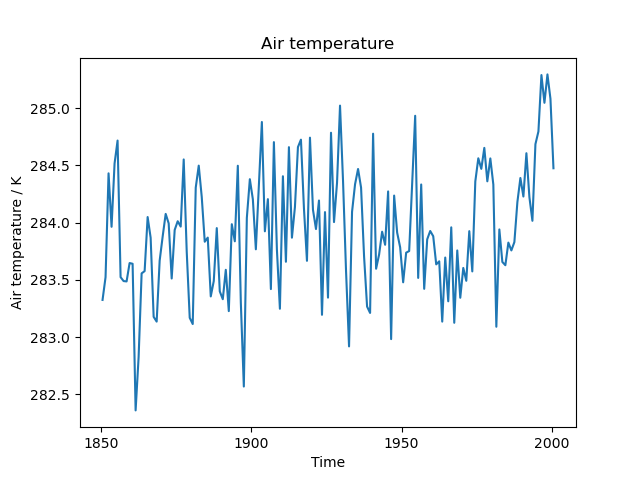

ImageItem(filename='tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to BCC-ESM1.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})


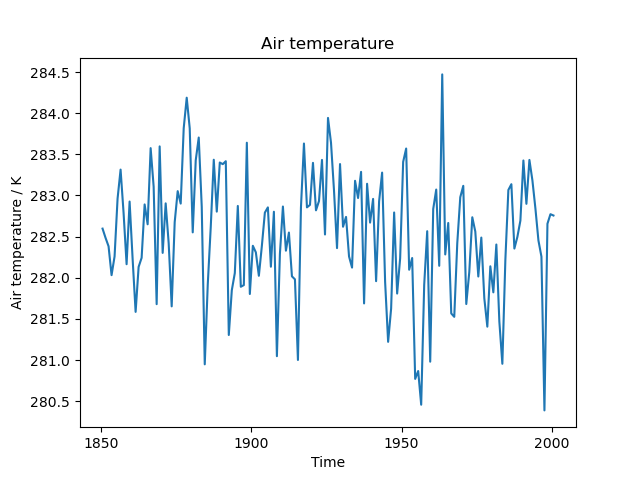

ImageItem(filename='tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.png',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/MultiModelMean_Amon_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to MultiModelMean.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})


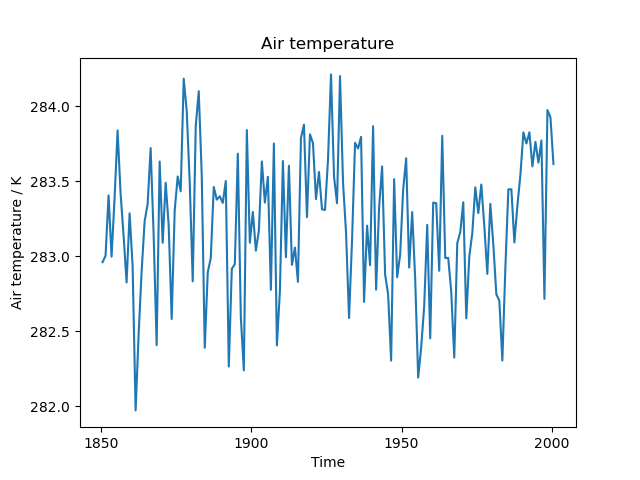

ImageItem(filename='tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.png',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_global/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to CanESM2.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})


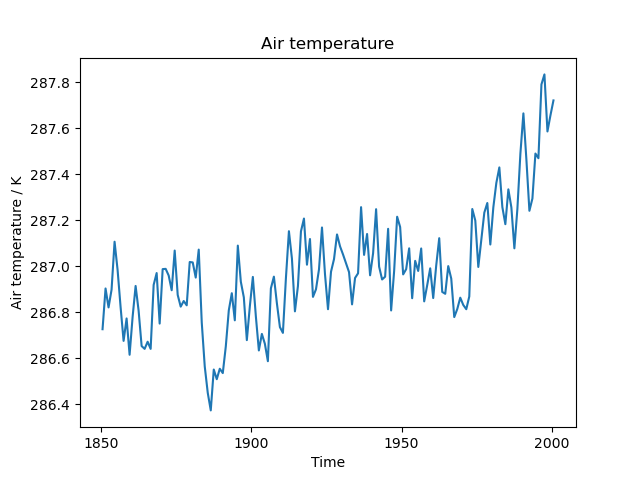

ImageItem(filename='tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.png',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_global/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to BCC-ESM1.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})


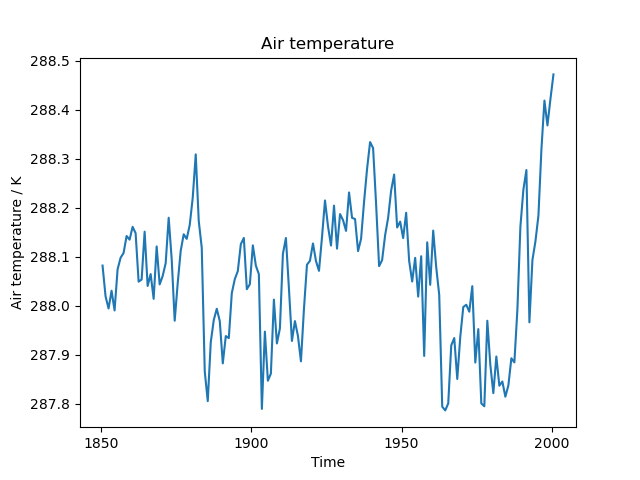

DataItem(filename='tas_amsterdam_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to CanESM2.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})

DataItem(filename='tas_amsterdam_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to BCC-ESM1.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})

DataItem(filename='tas_amsterdam_MultiModelMean_Amon_tas_1850-2000.nc',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_amsterdam/MultiModelMean_Amon_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to MultiModelMean.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})

DataItem(filename='tas_global_CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_global/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to CanESM2.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})

DataItem(filename='tas_global_CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc',
data={'ancestors': ['/home/stef/esmvaltool_output/recipe_python_20210115_133236/preproc/timeseries/tas_global/CMIP6_BCC-ESM1_Amon_historical_r1i1p1f1_tas_1850-2000.nc'],
 'authors': ['andela_bouwe', 'righi_mattia'],
 'caption': 'Average Near-Surface Air Temperature between 1850 and 2000 '
            'according to BCC-ESM1.',
 'domains': ['global'],
 'plot_types': ['zonal'],
 'references': ['acknow_project'],
 'statistics': ['mean']})

In [193]:
from IPython.display import display

for item in d[task]:
    display(item)

In [218]:
t = list(recipe._recipe_engine.tasks)[0]
ps = list(t.products)
p = ps[0]
r = p.provenance.records
r.get_

[<ProvAttribution: (recipe:recipe_python.yml, author:Andela, Bouwe)>,
 <ProvStart: (task:map/script1, recipe:recipe_python.yml)>,
 <ProvAgent: author:Andela, Bouwe>,
 <ProvEntity: recipe:recipe_python.yml>,
 <ProvAgent: project:DLR project ESMVal>,
 <ProvActivity: task:map/script1>,
 <ProvAgent: author:Righi, Mattia>,
 <ProvAttribution: (recipe:recipe_python.yml, author:Righi, Mattia)>,
 <ProvActivity: software:esmvaltool==2.1.0>,
 <ProvAttribution: (recipe:recipe_python.yml, project:DLR project ESMVal)>,
 <ProvAgent: project:Copernicus Climate Change Service 34a Lot 2 (MAGIC) project>,
 <ProvAttribution: (recipe:recipe_python.yml, project:Copernicus Climate Change Service 34a Lot 2 (MAGIC) project)>,
 <ProvEntity: file:/home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/map/script1/png/CMIP5_CanESM2_Amon_historical_r1i1p1_tas_2000-2000.png>,
 <ProvAgent: author:Andela, Bouwe>,
 <ProvAttribution: (file:/home/stef/esmvaltool_output/recipe_python_20210115_133236/plots/map/sc

In [219]:
p = t._collect_provenance()

In [220]:
p